In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahighosh149","key":"de64ee62ca749c63f5f1fc960358f419"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gokulrajkmv/unemployment-in-india

Dataset URL: https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india
License(s): other
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 35.6MB/s]


In [ ]:
!unzip unemployment-in-india.zip

Archive:  unemployment-in-india.zip
  inflating: Unemployment in India.csv  
  inflating: Unemployment_Rate_upto_11_2020.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [ ]:
data = pd.read_csv('Unemployment in India.csv')
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [ ]:
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated 

In [ ]:
print(data.describe())


       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000  


In [ ]:
data = data.dropna()

In [ ]:
data[' Date'] = pd.to_datetime(data[' Date'])


<ipython-input-25-8c8184107454>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[' Date'] = pd.to_datetime(data[' Date'])  # Replace 'date' with the actual column name


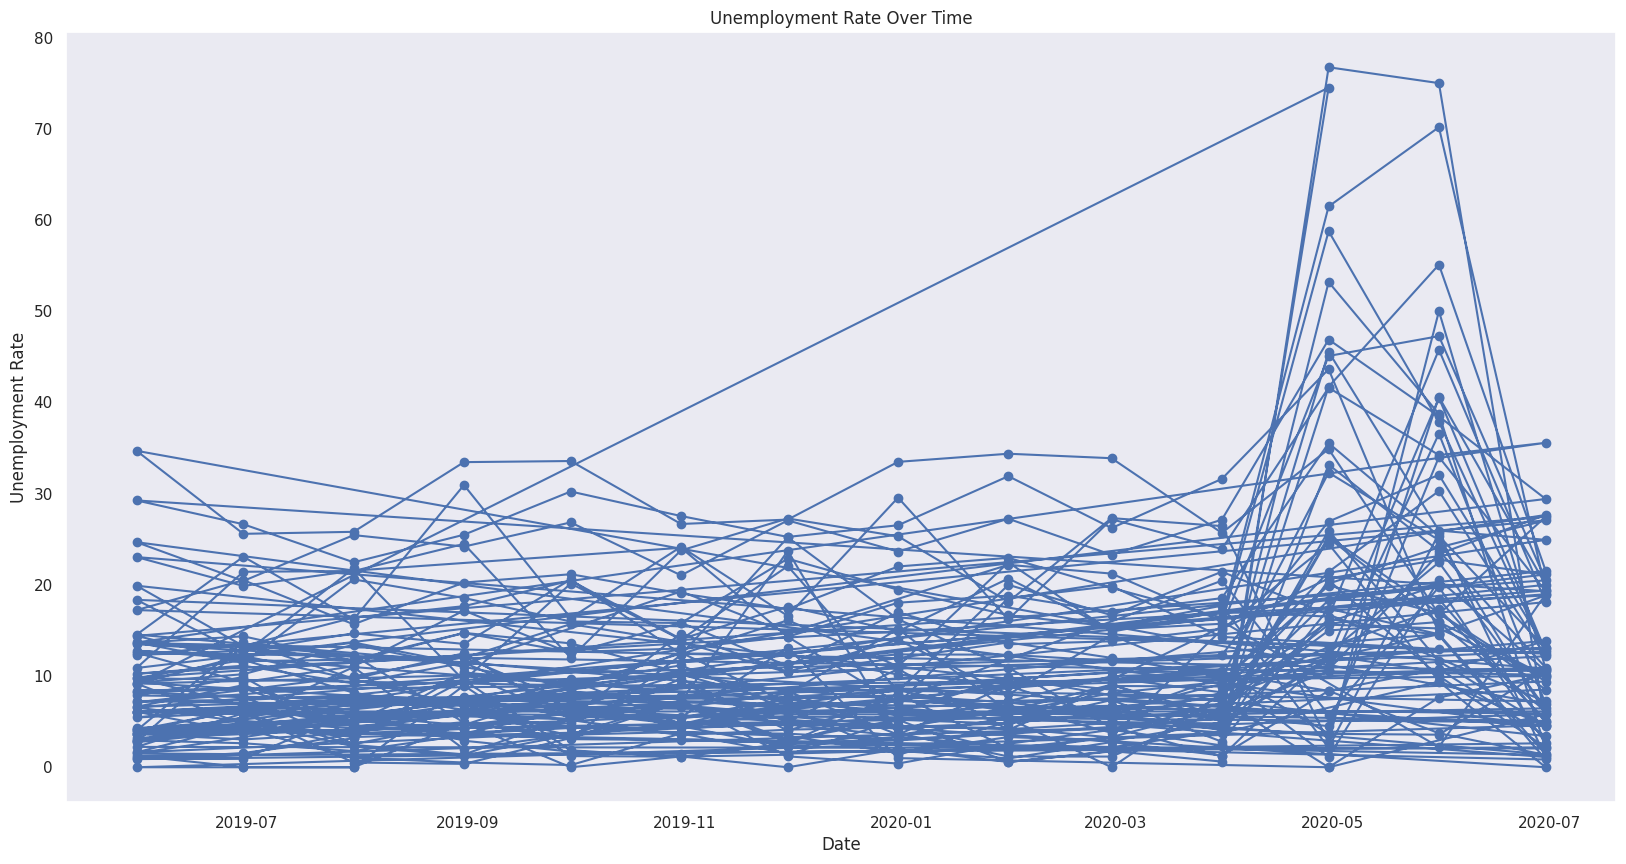

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(data[' Date'], data[' Estimated Unemployment Rate (%)'], marker='o', color='b')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.grid()
plt.show()


<ipython-input-28-5890cc9dd595>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')


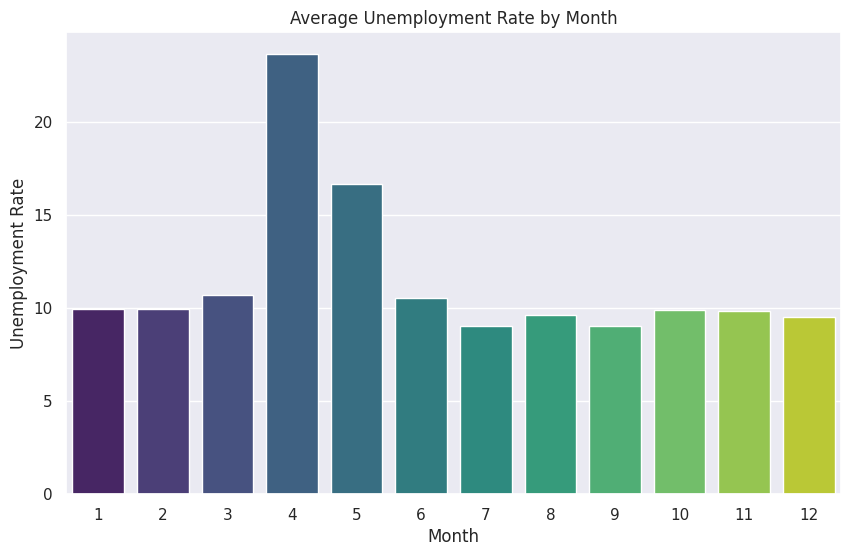

In [ ]:
data['month'] = data[' Date'].dt.month
monthly_avg = data.groupby('month')[' Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')
plt.title('Average Unemployment Rate by Month')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.show()


In [ ]:
print(data.columns)
data.columns = data.columns.str.strip()


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'month'],
      dtype='object')


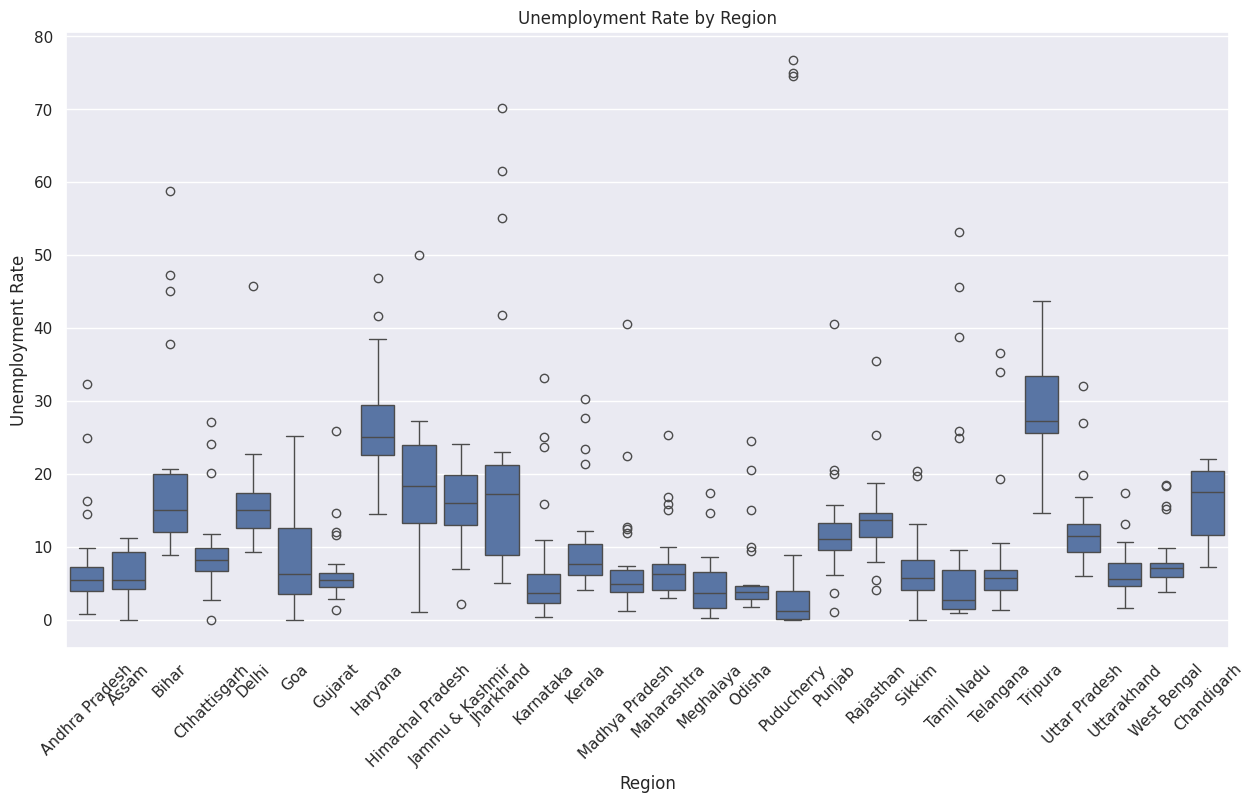

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=data)  # Adjust based on exact column names
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()


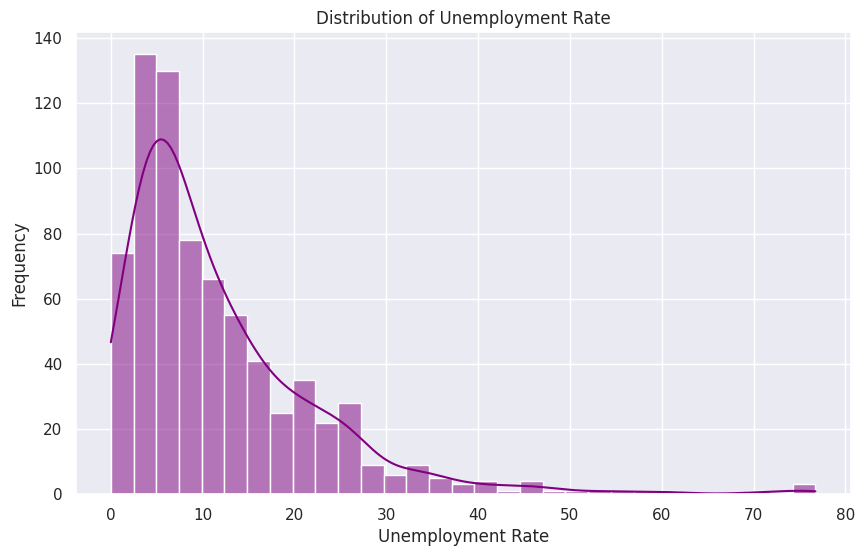

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Unemployment Rate (%)'], kde=True, color='purple')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()


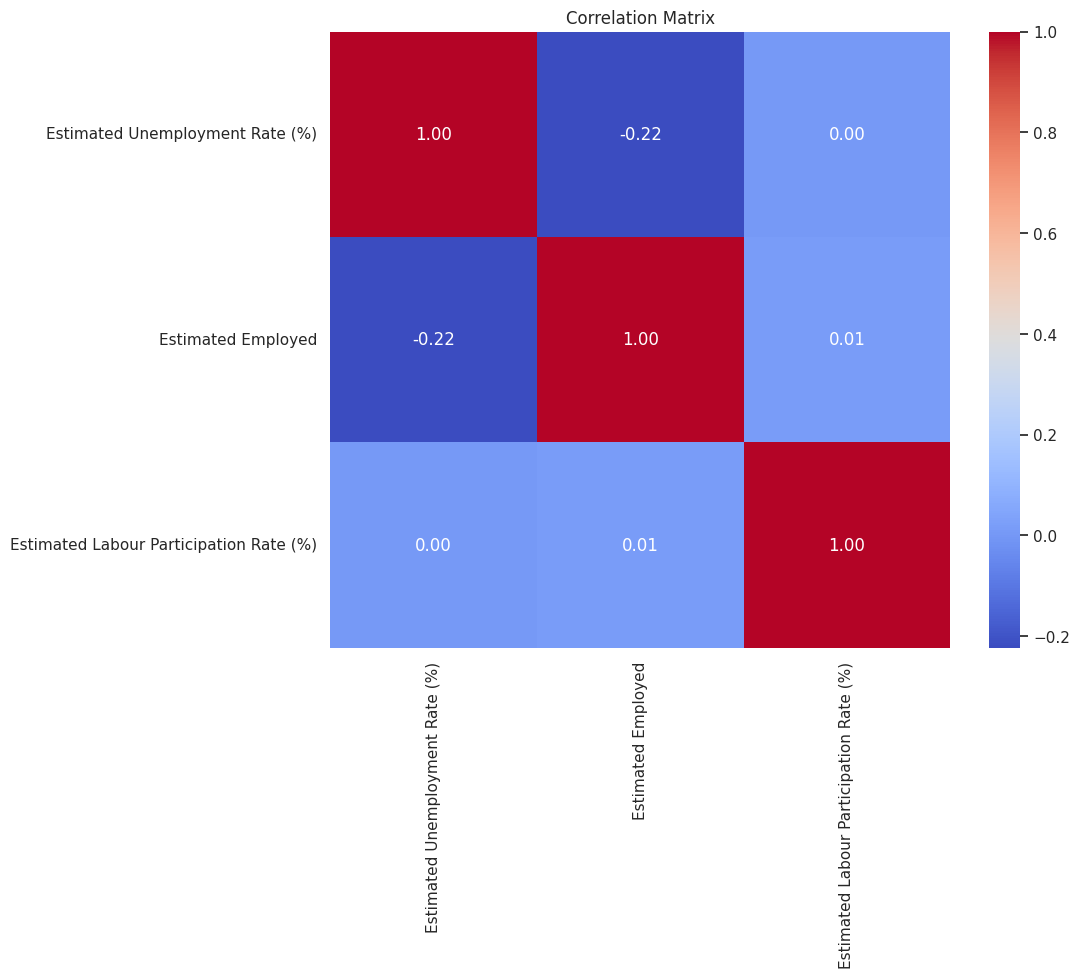

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


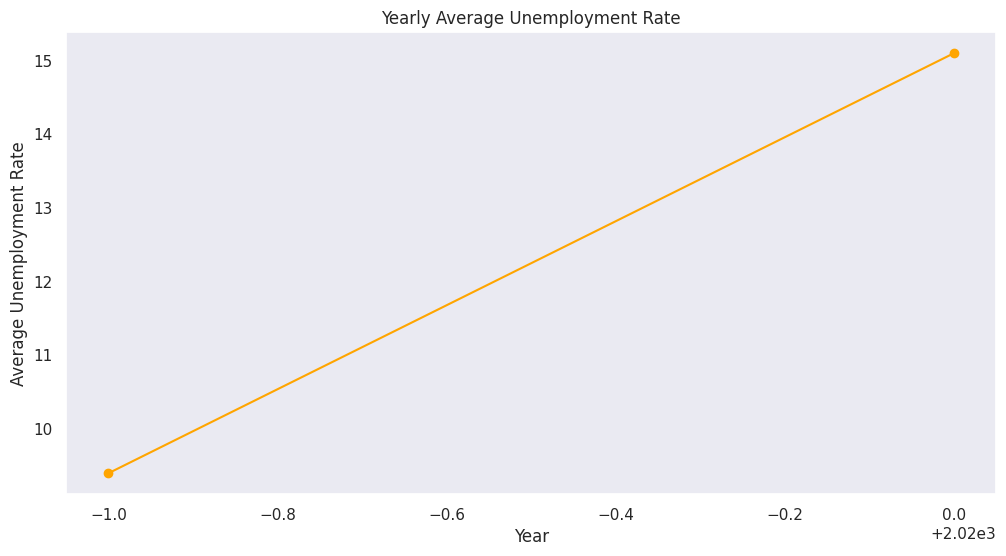

In [ ]:
data['year'] = data['Date'].dt.year
yearly_avg = data.groupby('year')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='orange')
plt.title('Yearly Average Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate')
plt.grid()
plt.show()
